In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define computational domain size
Nx, Ny, Nz = 5, 10, 10  # Grid size
resolution = 10  # Grid resolution (points per unit length)

dx = 1/resolution # 0.1
dt = 1/(2*resolution) # 0.05

# Create a 3D computational cell
cell_size = mp.Vector3(Nx, Ny, Nz)

# Define a Gaussian point source at the center
wavelength = 1.0  # Central wavelength
freq = 1 / wavelength  # Frequency
source = mp.Source(
    src=mp.GaussianSource(frequency=freq, fwidth=0.05 * freq * 2 * np.pi),
    # src=mp.ContinuousSource(frequency=freq, fwidth=0.2 * freq),
    component=mp.Ex,  
    center=mp.Vector3(0, 0, 0)  # Positioned at the center
)

In [3]:
# Set up the simulation with vacuum and a single source
sim = mp.Simulation(
    cell_size=cell_size,
    resolution=resolution,
    sources=[source],
    boundary_layers=[mp.PML(1.0)],  # Absorbing boundaries to avoid reflections
)

In [4]:
vals = []

def get_slice(sim):
    vals.append(sim.get_array(center=mp.Vector3(0, 0, 0), size=mp.Vector3(0, Ny, Nz), component=mp.Ex))

total_time = 100
time_interval = 5

sim.run(mp.at_every(time_interval, get_slice),
        until=total_time)



-----------
Initializing structure...
time for choose_chunkdivision = 0.000142097 s
Working in 3D dimensions.
Computational cell is 5 x 10 x 10 with resolution 10
time for set_epsilon = 0.440476 s
-----------
Meep progress: 24.1/100.0 = 24.1% done in 4.0s, 12.6s to go
on time step 482 (time=24.1), 0.00830136 s/step
Meep progress: 54.650000000000006/100.0 = 54.7% done in 8.0s, 6.6s to go
on time step 1093 (time=54.65), 0.00654935 s/step
Meep progress: 85.2/100.0 = 85.2% done in 12.0s, 2.1s to go
on time step 1704 (time=85.2), 0.00654968 s/step
run 0 finished at t = 100.0 (2000 timesteps)


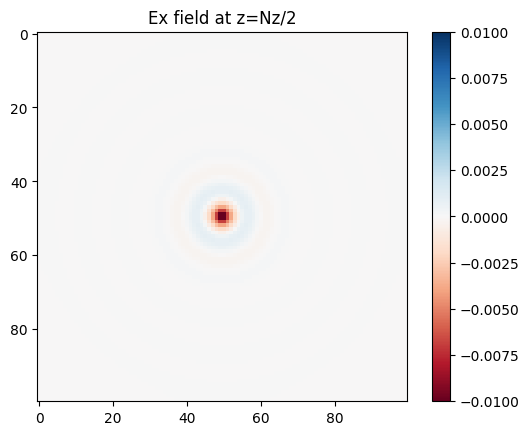

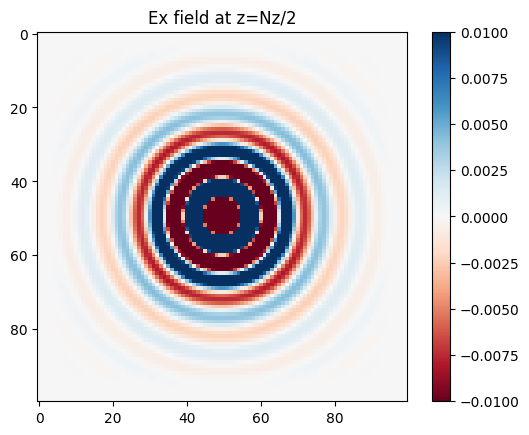

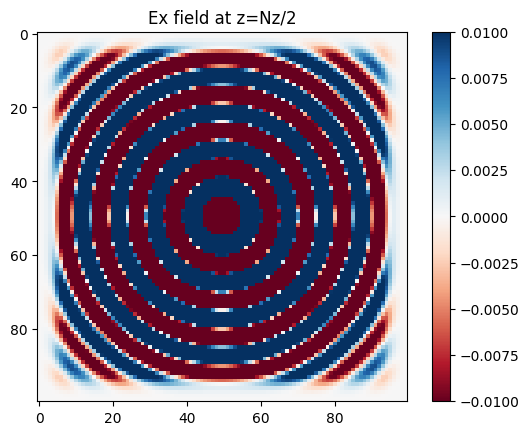

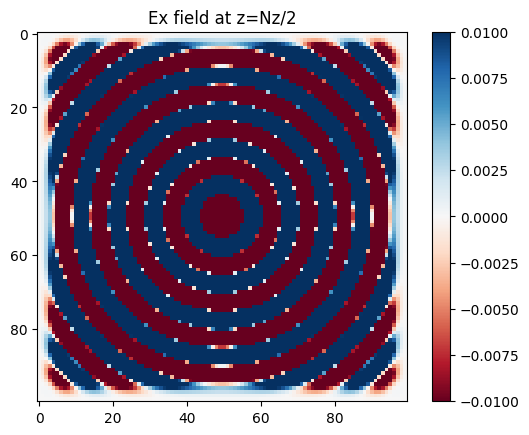

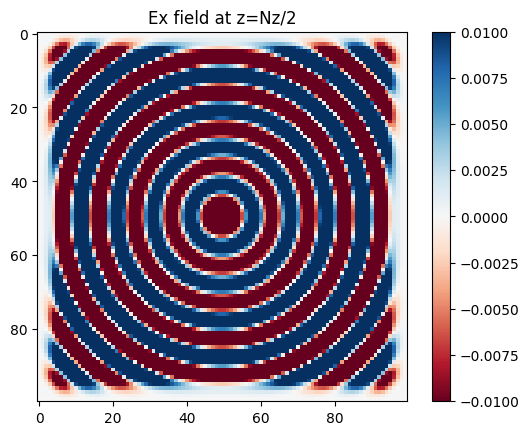

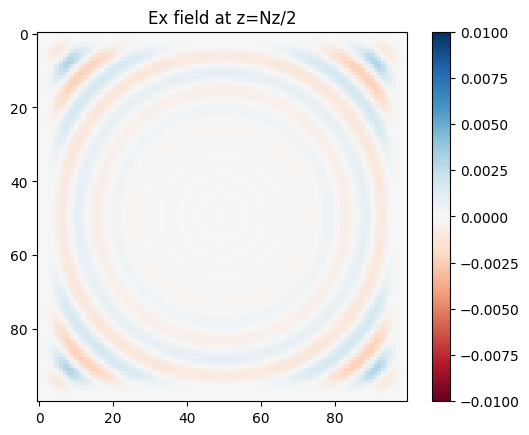

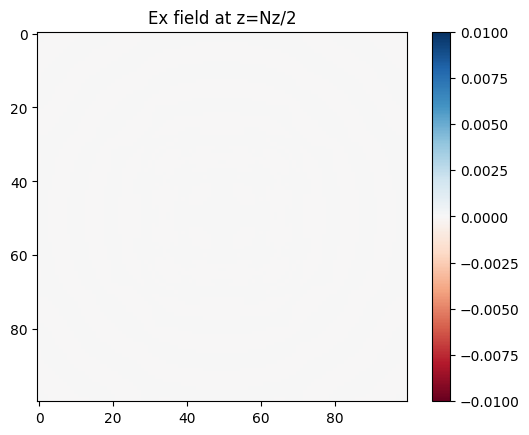

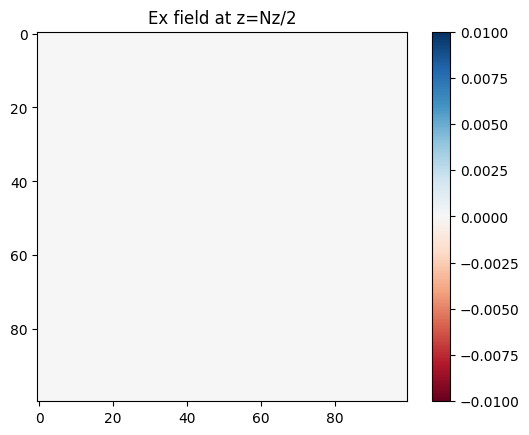

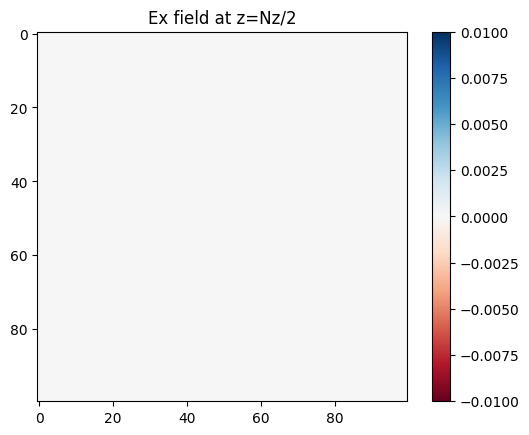

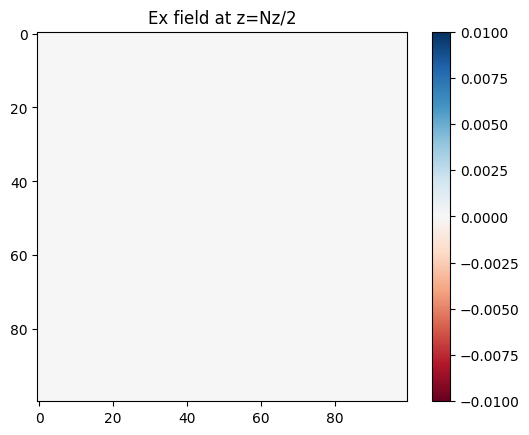

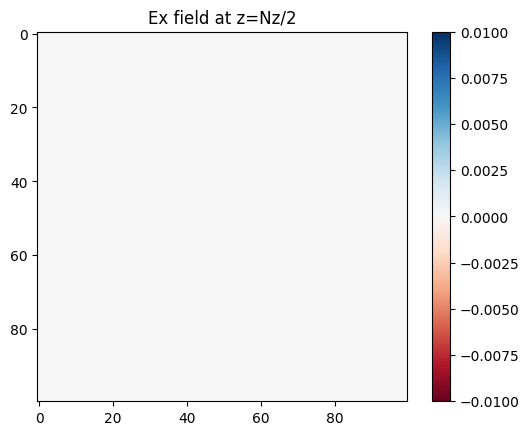

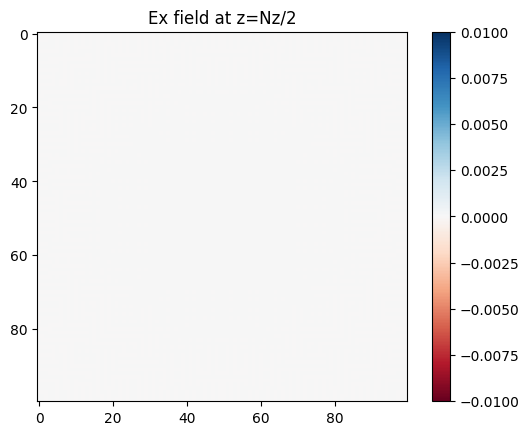

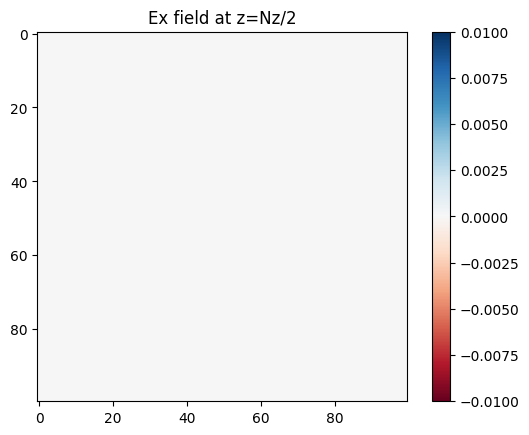

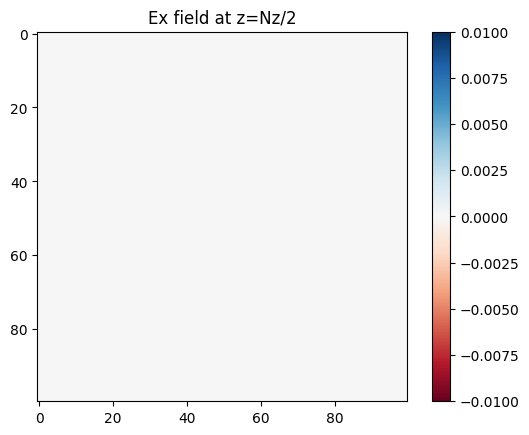

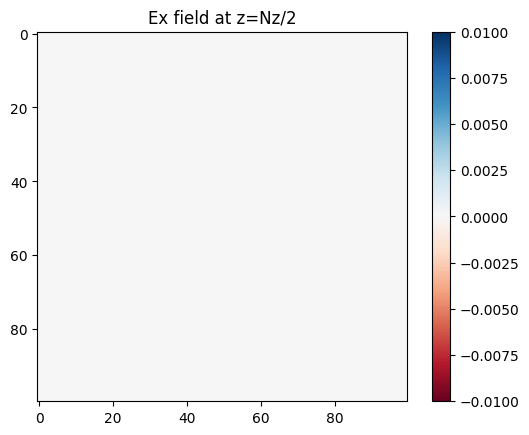

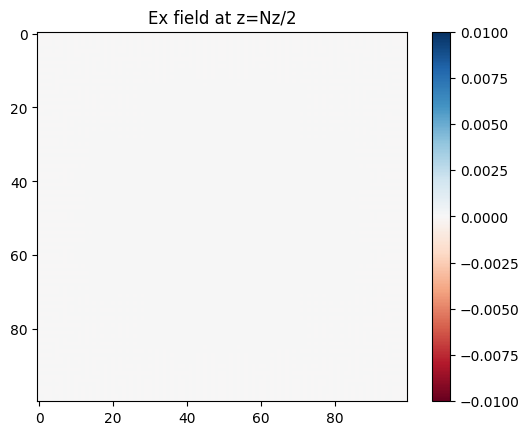

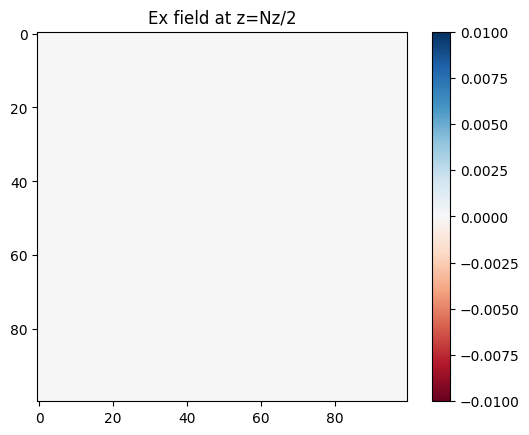

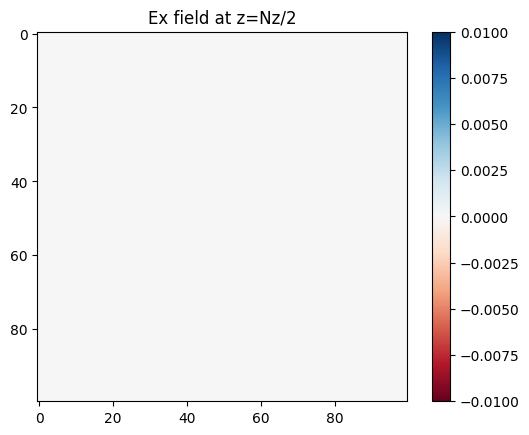

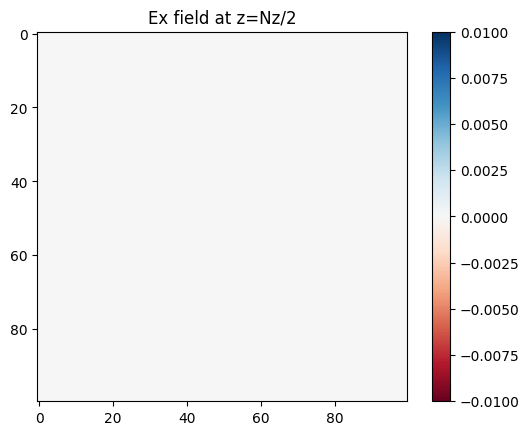

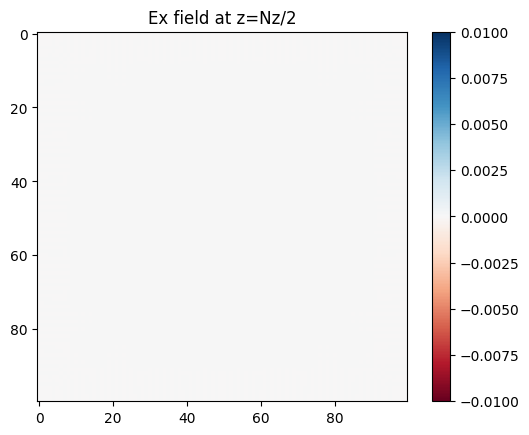

In [5]:
import matplotlib.pyplot as plt

plt.figure()
for i in range(int(total_time/time_interval)):
    plt.imshow(vals[i], cmap='RdBu', vmin = -0.01, vmax = 0.01)
    plt.colorbar()
    plt.title("Ex field at z=Nz/2")
    plt.show()

In [6]:
len(vals)

20

In [7]:
# Run the simulation
# sim.run(until=20)

In [8]:
#eps_data = sim.get_array(center=mp.Vector3(0, 0, 0), size=mp.Vector3(Nx, Ny, 0), component=mp.Ex)
#plt.imshow(eps_data.transpose(), cmap='RdBu', interpolation='spline36', vmin = -0.2, vmax = 0.2)
#plt.colorbar()
#plt.title("Ex field at z=Nz/2")
#plt.show()